<a href="https://colab.research.google.com/github/brendontj/CC-Fraud-Detection/blob/master/cc_fraud_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv('creditcard.csv')
print('Quantidade de linhas do dataset {}'.format(data.shape[0]))
data.head()

Quantidade de linhas do dataset 284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df = data.dropna()
df = df.drop(columns="Time") # Removing column time, because is not relevant
df['ID']= np.arange(1,len(df.Class)+1)
print('Quantidade de linhas do dataset sem valor Null/NaN/NaT {}'.format(df.shape[0]))
df.head()

Quantidade de linhas do dataset sem valor Null/NaN/NaT 284807


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,ID
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,3
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,5


In [7]:
x_train,  x_test, y_train, y_test = train_test_split(df.drop(['ID', 'Class'], axis=1), df['Class'], test_size=0.20, random_state = 0)
print('Dados de treino {}\n'.format(x_train.shape))
print('Dados de teste  {}\n'.format(x_test.shape))

Dados de treino (227845, 29)

Dados de teste  (56962, 29)



In [8]:
df_train = x_train.copy()
df_train['Class'] = y_train
df_test = x_test.copy()
df_test['Class'] = y_test

In [9]:
df_train['Class'].value_counts()

0    227454
1       391
Name: Class, dtype: int64

In [10]:
df_test['Class'].value_counts()

0    56861
1      101
Name: Class, dtype: int64

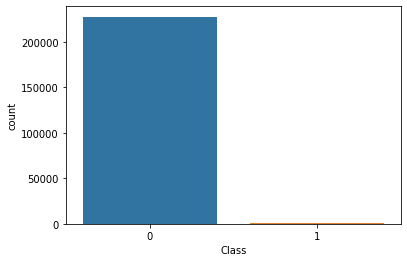

In [11]:
ax = sns.countplot(x="Class", data=df_train)

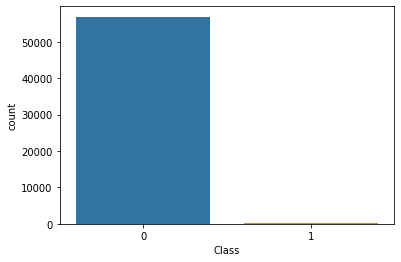

In [12]:
bx = sns.countplot(x="Class", data=df_test)

In [13]:
n_fraudulent_transactions = df_train['Class'].value_counts()[1]
print('Quantidade de transações fraudulentas no dataset de treino ({}) representando um total de ({})% do dataset'.format(n_fraudulent_transactions, (n_fraudulent_transactions/df_train.shape[0])*100))
n_fraudulent_transactions = df_test['Class'].value_counts()[1]
print('Quantidade de transações fraudulentas no dataset de teste ({}) representando um total de ({})% do dataset'.format(n_fraudulent_transactions, (n_fraudulent_transactions/df_test.shape[0])*100))

Quantidade de transações fraudulentas no dataset de treino (391) representando um total de (0.171607891329632)% do dataset
Quantidade de transações fraudulentas no dataset de teste (101) representando um total de (0.1773111899160844)% do dataset


In [14]:
mic = mutual_info_classif(x_train, y_train)
mic

array([0.00223417, 0.00324333, 0.0048859 , 0.00494311, 0.0024805 ,
       0.00235812, 0.00385478, 0.00200889, 0.00420066, 0.00735391,
       0.00683457, 0.00754913, 0.00048603, 0.00796175, 0.00033733,
       0.00614541, 0.00819216, 0.00429184, 0.00147992, 0.00127442,
       0.00256113, 0.0004726 , 0.00081558, 0.00072547, 0.0006311 ,
       0.00054575, 0.00238648, 0.00180494, 0.00138477])

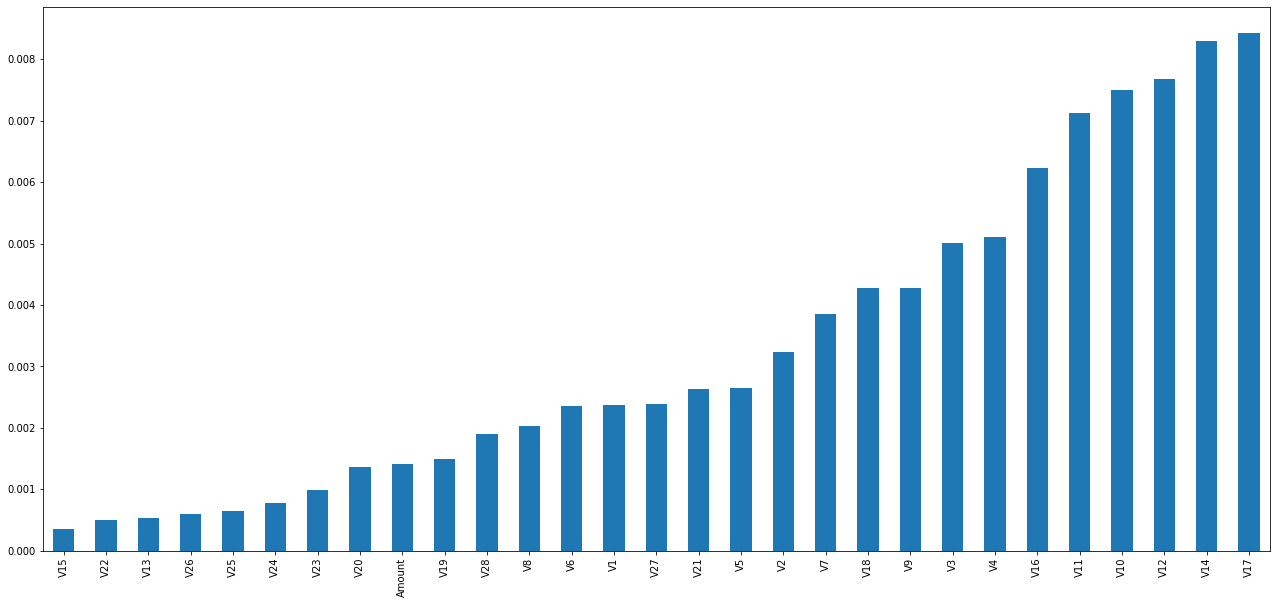

In [ ]:
mic = pd.Series(mic)
mic.index = x_train.columns
mic = mic.sort_values(ascending = True)
mic.plot.bar(figsize=(22,10))

In [ ]:
selection = SelectKBest(mutual_info_classif, k= 20).fit(x_train, y_train)

# Random Forest

In [ ]:
X_train = x_train[x_train.columns[selection.get_support()]]

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_train)

print(classification_report(y_train, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184802
           1       1.00      1.00      1.00       322

    accuracy                           1.00    185124
   macro avg       1.00      1.00      1.00    185124
weighted avg       1.00      1.00      1.00    185124



In [ ]:
print(pd.crosstab(y_train, predictions, rownames=['Real'],colnames=['Predito'],margins=True)) #Matriz de confusão dos valores preditos com o conjunto de treino

Predito       0    1     All
Real                        
0        184802    0  184802
1             0  322     322
All      184802  322  185124


In [ ]:
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
scores
print(scores.mean())

0.9994868305946192


In [ ]:
X_test = x_test[x_test.columns[selection.get_support()]]
predictions_test = rf.predict(X_test)
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99513
           1       0.94      0.77      0.85       170

    accuracy                           1.00     99683
   macro avg       0.97      0.89      0.92     99683
weighted avg       1.00      1.00      1.00     99683



In [ ]:
print(pd.crosstab(y_test, predictions_test, rownames=['Real'],colnames=['Predito'],margins=True)) #Matriz de confusão dos valores preditos com o conjunto de teste

Predito      0    1    All
Real                      
0        99505    8  99513
1           39  131    170
All      99544  139  99683


In [ ]:
scores = cross_val_score(rf, X_test, predictions_test, cv=5, scoring='accuracy')
print(scores.mean())


0.99985955660008


# KNN 

# MLPClassifier